## IMPORT PACKAGES

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
print ("CURRENT TF VERSION IS [%s]" % (tf.__version__))
print ("PACKAGES LOADED")

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


CURRENT TF VERSION IS [1.10.0]
PACKAGES LOADED


## LOAD MNIST DATA

In [2]:
mnist = input_data.read_data_sets('../data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## INVESTIGATE MNIST DATA

In [3]:
def print_np(x):
    print ('SHAPE OF is %s' % (x.shape,))
    print ('VALUES LOOK LIKE \n %s' % (x))

In [4]:
print_np(mnist.train.images)
print_np(mnist.train.labels)

SHAPE OF is (55000, 784)
VALUES LOOK LIKE 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SHAPE OF is (55000, 10)
VALUES LOOK LIKE 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [5]:
print_np(mnist.test.images)
print_np(mnist.test.labels)

SHAPE OF is (10000, 784)
VALUES LOOK LIKE 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SHAPE OF is (10000, 10)
VALUES LOOK LIKE 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print_np(mnist.validation.images)
print_np(mnist.validation.labels)

SHAPE OF is (5000, 784)
VALUES LOOK LIKE 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SHAPE OF is (5000, 10)
VALUES LOOK LIKE 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


## DRAW MNIST DATA 

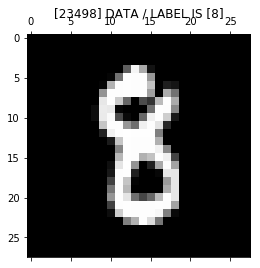

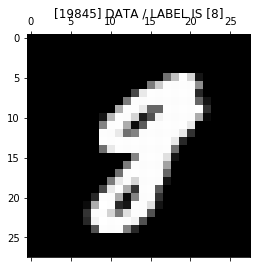

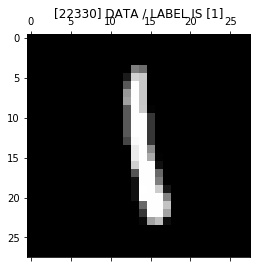

In [7]:
ntrain = mnist.train.images.shape[0]
nsample = 3
randidx = np.random.randint(ntrain, size=nsample)
for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28, 28))
    label = np.argmax(labelvec)
    plt.matshow(img, cmap=plt.get_cmap('gray'))
    plt.title("[%d] DATA / LABEL IS [%d]"%(i, label))

## GET RANDOM BATCH

In [8]:
ntrain = 10
randindices = np.random.permutation(ntrain)
print (randindices.shape)

(10,)


In [9]:
ntrain = 10
nbatch = 4
niter  = ntrain // nbatch + 1
for i in range(niter):
    currindices = randindices[i*nbatch:(i+1)*nbatch]
    print ("ITER: [%d] BATCH INDEX: %s" % (i, currindices))
    # GET BATCH
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    print ("  - SHAPE OF 'XBATCH' IS %s" % (xbatch.shape,))
    print ("  - SHAPE OF 'YBATCH' IS %s" % (ybatch.shape,))

ITER: [0] BATCH INDEX: [9 6 5 0]
  - SHAPE OF 'XBATCH' IS (4, 784)
  - SHAPE OF 'YBATCH' IS (4, 10)
ITER: [1] BATCH INDEX: [4 7 2 3]
  - SHAPE OF 'XBATCH' IS (4, 784)
  - SHAPE OF 'YBATCH' IS (4, 10)
ITER: [2] BATCH INDEX: [1 8]
  - SHAPE OF 'XBATCH' IS (2, 784)
  - SHAPE OF 'YBATCH' IS (2, 10)


## DEFINE MODEL

In [24]:
# NETWORK TOPOLOGIES
n_hidden_1 = 256 
n_hidden_2 = 128 
n_input    = 784 
n_classes  = 10

# INPUTS AND OUTPUTS
x = tf.placeholder(tf.float32, shape=[None, n_input])         # [EXERCISE 1]
y = tf.placeholder(tf.float32, shape=[None, n_classes])       # [EXERCISE 1]
    
# NETWORK PARAMETERS
stddev = 0.1
weights = {
    'h1':  tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev))    ,    # [EXERCISE 1],
    'h2':  tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)), # [EXERCISE 1],
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))  # [EXERCISE 1]
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),    # [EXERCISE 1],
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),    # [EXERCISE 1],
    'out':tf.Variable(tf.random_normal([n_classes]))  # [EXERCISE 1]
}
print ("NETWORK READY")

NETWORK READY


## BUILD GRAPH

In [28]:
# MODEL
def multilayer_perceptron(_X, _weights, _biases):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['h1']),_biases['b1']))   # [EXERCISE 2]
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, _weights['h2']),_biases['b2']))   # [EXERCISE 2]
    return tf.add(tf.matmul(layer_2, _weights['out']), _biases['out'])


# PREDICTION
pred = multilayer_perceptron(x, weights, biases)

# LOSS AND OPTIMIZER
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))# [EXERCISE 3], logits=# [EXERCISE 3]))
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 
corr = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))# [EXERCISE 3]
accr = tf.reduce_mean(tf.cast(corr, "float"))

# INITIALIZER
init = tf.global_variables_initializer()
print ("FUNCTIONS READY")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

FUNCTIONS READY


## RUN

In [29]:
# PARAMETERS
training_epochs = 20
batch_size      = 100
display_step    = 4
# LAUNCH THE GRAPH
sess = tf.Session()
sess.run(init)
# OPTIMIZE
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # ITERATION
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds)
    avg_cost = avg_cost / total_batch
    # DISPLAY
    if (epoch+1) % display_step == 0:
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        print ("TRAIN ACCURACY: %.3f" % (train_acc))
        feeds = {x: mnist.test.images, y: mnist.test.labels}
        test_acc = sess.run(accr, feed_dict=feeds)
        print ("TEST ACCURACY: %.3f" % (test_acc))
print ("OPTIMIZATION FINISHED")

Epoch: 003/020 cost: 0.120959279
TRAIN ACCURACY: 0.970
TEST ACCURACY: 0.962
Epoch: 007/020 cost: 0.046868828
TRAIN ACCURACY: 0.980
TEST ACCURACY: 0.977
Epoch: 011/020 cost: 0.018150355
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.978
Epoch: 015/020 cost: 0.006657336
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.980
Epoch: 019/020 cost: 0.002285227
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.981
OPTIMIZATION FINISHED
